<a href="https://colab.research.google.com/github/BuiHoangTu/XLTH/blob/main/XLTH3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

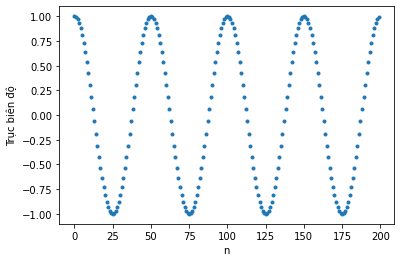

In [7]:
# Bài tập 4: Xác định lỗi lượng tử của tín hiệu hình sin
# Bùi Hoàng Tú 20200547

import matplotlib.pyplot as plt
import numpy as np
import math
import random 
from bisect import bisect_left



# Vẽ tín hiệu x(n): 
f0 = 1/50
N = 200 
n = np.arange(N)
xn = np.cos(2*math.pi * f0 * n)
plt.plot(n, xn, ".")
plt.xlabel("n")
plt.ylabel("Trục biên độ")
plt.show()

In [8]:
# Lượng tử hóa theo phương pháp lượng tử Rounding
def quantize(val, to_values):
    """Quantize a value with regards to a set of allowed values.
    
    Examples:
        quantize(49.513, [0, 45, 90]) -> 45
        quantize(43, [0, 10, 20, 30]) -> 30
    
    Note: function doesn't assume to_values to be sorted and
    iterates over all values (i.e. is rather slow).
    
    Args:
        val        The value to quantize
        to_values  The allowed values
    Returns:
        Closest value among allowed values.
    """
    best_match = None
    best_match_diff = None
    for other_val in to_values:
        diff = abs(other_val - val)
        if best_match is None or diff < best_match_diff:
            best_match = other_val
            best_match_diff = diff
    return best_match



In [15]:
#solution to this problem
def solution(delta):
  xqn = np.linspace(0,1,delta)
  #xnn : xn after quantized
  xnn = []
  Pq = 0.0

  for xi in xn: 
    xi = quantize(xi, xqn)
    xnn.append(xi)

  # Vẽ xq(n)
  plt.stem(n, xnn)
  # Vẽ eq(n)
  plt.plot(n, xnn - xn)
  plt.xlabel("Trục thời gian n")
  plt.ylabel("Trục biên độ")
  plt.title("Lượng tử ở mức " + str(delta))
  plt.grid()
  plt.show()
  # Tính SQNR
  
  i=0
  while(i < N):
    Pq += (xn[i]-xnn[i]) * (xn[i]-xnn[i])
    i+=1
  #for xi in xn:
   # for xj in xnn:
    #  Pq += (xj - xi) * (xj - xi) 

  Pq = Pq/N
  # 𝑃x = 𝐴^2/2
  Px = 1/2 

  SQNR = Px/Pq
  print("\n")
  print("SQNR:", SQNR) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


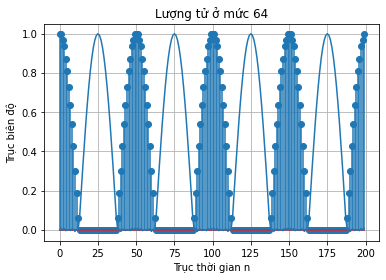



SQNR: 1.999931425812064


In [16]:
# Mức 1: mức lượng tử là 64
solution(64)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


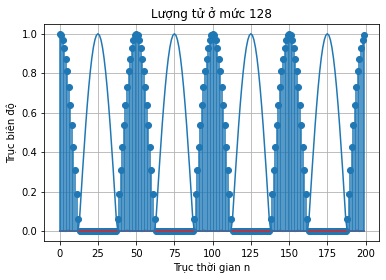



SQNR: 1.999991159785305


In [17]:
# Mức 2: mức lượng tử là 128
solution(128)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


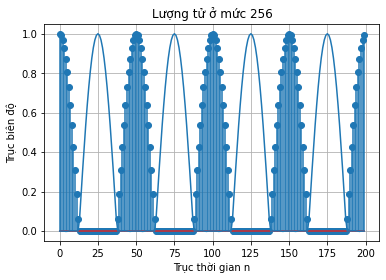



SQNR: 1.9999954129245057


In [18]:
# Mức 3: mức lượng tử là 256
solution(256)